In [181]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter

In [182]:
result_ARIMA = pd.read_csv("../Arima/only_arima.csv")
result_LR = pd.read_csv("../LinearRegression/only_LR.csv")
result_XGB = pd.read_csv("../LinearRegression/only_XGB.csv")
result_LSTM = pd.read_csv("../LSTM/only_LSTM.csv")

In [183]:
best_ARIMA = pd.read_csv("../Arima/only_best_arima_100.csv")
best_LR = pd.read_csv("../LinearRegression/only_best_LR_500.csv")
best_XGB = pd.read_csv("../LinearRegression/only_best_XGB_best_100.csv")
best_LSTM = pd.read_csv("../LSTM/only_best_LSTM_100.csv")

In [184]:
def test_sliced_df(df):
    return_of_rate_columns = []
    for column in df.columns:

        if column.find("return_of_rate") != -1 and column.find("cumulative") == -1:
            return_of_rate_columns.append(column)

        if column == "return of rate" or column == "return_of_rate":
            df["cumulative return of rate"] = df[column].cumprod()

    for column in return_of_rate_columns:
        condition = column.split("+")[0]
        cumulative_column = condition + "+cumulative_return_of_rate"
        df[f"{cumulative_column}"] = df[f"{column}"].cumprod()

    return df

In [185]:
drop_list = ['2017-04-11', '2017-04-12','2017-04-13','2017-04-14','2017-04-15','2017-04-16','2017-04-17', '2017-04-18','2017-04-19', '2017-04-20',
'2017-04-21','2017-04-22','2017-04-23','2017-04-24','2017-04-25','2017-04-26','2017-04-27', '2017-04-28','2017-04-29', '2017-04-30',
'2017-05-01','2017-05-02','2017-05-03','2017-05-04','2017-05-05','2017-05-06','2017-05-07', '2017-05-08','2017-05-09', '2017-05-10', '2017-05-11','2022-05-16']

# cu_ARIMA = result_ARIMA.filter(regex='cumulative')
result_ARIMA['Datetime']= result_ARIMA['Unnamed: 0']
result_ARIMA.index = result_ARIMA['Datetime']
result_ARIMA.index = pd.to_datetime(result_ARIMA.index)
result_ARIMA = result_ARIMA.drop(drop_list, axis = 0)
result_ARIMA = result_ARIMA.drop('2017-04-10', axis = 0)
result_ARIMA = test_sliced_df(result_ARIMA)
cu_ARIMA = result_ARIMA.filter(regex='cumulative')

result_LR['Datetime']= result_LR['Unnamed: 0']
result_LR.index = result_LR['Datetime']
result_LR.index = pd.to_datetime(result_LR.index)
result_LR = test_sliced_df(result_LR)
cu_LR = result_LR.filter(regex='cumulative')

result_XGB['Datetime']= result_XGB['Unnamed: 0']
result_XGB.index = result_XGB['Datetime']
result_XGB.index = pd.to_datetime(result_XGB.index)
result_XGB = result_XGB.drop(drop_list, axis = 0)
result_XGB = test_sliced_df(result_XGB)
cu_XGB = result_XGB.filter(regex='cumulative')

result_LSTM['Datetime']= result_LSTM['Unnamed: 0']
result_LSTM.index = result_LSTM['Datetime']
result_LSTM.index = pd.to_datetime(result_LSTM.index)
result_LSTM = result_LSTM.drop(drop_list, axis = 0)
result_LSTM = test_sliced_df(result_LSTM)
cu_LSTM = result_LSTM.filter(regex='cumulative')

In [186]:

best_ARIMA['Datetime']= best_ARIMA['Unnamed: 0']
best_ARIMA.index = best_ARIMA['Datetime']
best_ARIMA.index = pd.to_datetime(best_ARIMA.index)
best_ARIMA.rename(columns={'cumulative_return_of_rate':'cumulative return of rate'}, inplace = True)
best_ARIMA = best_ARIMA.drop(drop_list, axis = 0)
best_ARIMA = best_ARIMA.drop('2017-04-10', axis = 0)
best_ARIMA = best_ARIMA.iloc[400:]
best_ARIMA = test_sliced_df(best_ARIMA)
cu_best_ARIMA = best_ARIMA.filter(regex='cumulative')

best_LR['Datetime']= best_LR['Unnamed: 0']
best_LR.index = best_LR['Datetime']
best_LR.index = pd.to_datetime(best_LR.index)
best_LR.rename(columns={'cumulative_return_of_rate':'cumulative return of rate'}, inplace = True)
best_LR = test_sliced_df(best_LR)
cu_best_LR = best_LR.filter(regex='cumulative')


best_XGB['Datetime']= best_XGB['Unnamed: 0']
best_XGB.index = best_XGB['Datetime']
best_XGB.index = pd.to_datetime(best_XGB.index)
best_XGB.rename(columns={'cumulative_return_of_rate':'cumulative return of rate'}, inplace = True)
best_XGB = best_XGB.drop(drop_list, axis = 0)
best_XGB = best_XGB.iloc[400:]
best_XGB = test_sliced_df(best_XGB)
cu_best_XGB = best_XGB.filter(regex='cumulative')


best_LSTM['Datetime']= best_LSTM['Unnamed: 0']
best_LSTM.index = best_LSTM['Datetime']
best_LSTM.index = pd.to_datetime(best_LSTM.index)
best_LSTM.rename(columns={'cumulative_return_of_rate':'cumulative return of rate'}, inplace = True)
best_LSTM = best_LSTM.drop(drop_list, axis = 0)
best_LSTM = best_LSTM.iloc[400:]
best_LSTM = test_sliced_df(best_LSTM)
cu_best_LSTM = best_LSTM.filter(regex='cumulative')

In [187]:
def plot_return(AR, LR, XGB, LSTM, name):
    plt.figure(figsize=(20, 8))
    years = YearLocator()
    yearsFmt = DateFormatter('%Y')
    
    ax = plt.subplot(241)
    plt.plot(AR.index, AR['cumulative return of rate'].values, label = "ARIMA", color="green") #이름으로 색 바꾸기 
    plt.plot(AR.index, LR['cumulative return of rate'].values, label = "LR", color = "red") 
    plt.plot(AR.index, XGB['cumulative return of rate'].values, label = "XGB", color = "blue") 
    plt.plot(AR.index, LSTM['cumulative return of rate'].values, label = "LSTM", color = "yellow")
    ax = plt.gca()
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(yearsFmt)
    plt.legend()
    plt.title(
        "cumulative_return_of_rate")
    plt.grid(True)
    
    ax = plt.subplot(242)
    plt.plot(AR.index, AR['ma+cumulative_return_of_rate'].values, label = "ARIMA", color="green") #이름으로 색 바꾸기 
    plt.plot(AR.index, LR['ma+cumulative_return_of_rate'].values, label = "LR", color = "red") 
    plt.plot(AR.index, XGB['ma+cumulative_return_of_rate'].values, label = "XGB", color = "blue") 
    plt.plot(AR.index, LSTM['ma+cumulative_return_of_rate'].values, label = "LSTM", color = "yellow")   
    plt.legend()
    ax = plt.gca()
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(yearsFmt)
    plt.title(
        "MA cumulative_return_of_rate")
    plt.grid(True)
    
    ax = plt.subplot(243)
    plt.plot(AR.index, AR['rsi+cumulative_return_of_rate'].values, label = "ARIMA", color="green") #이름으로 색 바꾸기 
    plt.plot(AR.index, LR['rsi+cumulative_return_of_rate'].values, label = "LR", color = "red") 
    plt.plot(AR.index, XGB['rsi+cumulative_return_of_rate'].values, label = "XGB", color = "blue") 
    plt.plot(AR.index, LSTM['rsi+cumulative_return_of_rate'].values, label = "LSTM", color = "yellow")   
    plt.legend()
    ax = plt.gca()
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(yearsFmt)
    plt.title(
        "RSI cumulative_return_of_rate")
    plt.grid(True)
    
    ax = plt.subplot(244)
    plt.plot(AR.index, AR['noise+cumulative_return_of_rate'].values, label = "ARIMA", color="green") #이름으로 색 바꾸기 
    plt.plot(AR.index, LR['noise+cumulative_return_of_rate'].values, label = "LR", color = "red") 
    plt.plot(AR.index, XGB['noise+cumulative_return_of_rate'].values, label = "XGB", color = "blue") 
    plt.plot(AR.index, LSTM['noise+cumulative_return_of_rate'].values, label = "LSTM", color = "yellow")   
    plt.legend()
    ax = plt.gca()
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(yearsFmt)
    plt.title(
        "Noise cumulative_return_of_rate")
    plt.grid(True)
    
    ax = plt.subplot(245)
    plt.plot(AR.index, AR['ma_noise+cumulative_return_of_rate'].values, label = "ARIMA", color="green") #이름으로 색 바꾸기 
    plt.plot(AR.index, LR['ma_noise+cumulative_return_of_rate'].values, label = "LR", color = "red") 
    plt.plot(AR.index, XGB['ma_noise+cumulative_return_of_rate'].values, label = "XGB", color = "blue") 
    plt.plot(AR.index, LSTM['ma_noise+cumulative_return_of_rate'].values, label = "LSTM", color = "yellow")   
    plt.legend()
    ax = plt.gca()
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(yearsFmt)
    plt.title(
        "MA & Noise cumulative_return_of_rate")
    plt.grid(True)
    
    ax = plt.subplot(246)
    plt.plot(AR.index, AR['ma_rsi+cumulative_return_of_rate'].values, label = "ARIMA", color="green") #이름으로 색 바꾸기 
    plt.plot(AR.index, LR['ma_rsi+cumulative_return_of_rate'].values, label = "LR", color = "red") 
    plt.plot(AR.index, XGB['ma_rsi+cumulative_return_of_rate'].values, label = "XGB", color = "blue") 
    plt.plot(AR.index, LSTM['ma_rsi+cumulative_return_of_rate'].values, label = "LSTM", color = "yellow")   
    plt.legend()
    ax = plt.gca()
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(yearsFmt)
    plt.title(
        "MA & RSI cumulative_return_of_rate")
    plt.grid(True)
    
    ax = plt.subplot(247)
    plt.plot(AR.index, AR['rsi_noise+cumulative_return_of_rate'].values, label = "ARIMA", color="green") #이름으로 색 바꾸기 
    plt.plot(AR.index, LR['rsi_noise+cumulative_return_of_rate'].values, label = "LR", color = "red") 
    plt.plot(AR.index, XGB['rsi_noise+cumulative_return_of_rate'].values, label = "XGB", color = "blue") 
    plt.plot(AR.index, LSTM['rsi_noise+cumulative_return_of_rate'].values, label = "LSTM", color = "yellow")   
    plt.legend()
    ax = plt.gca()
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(yearsFmt)
    plt.title(
        "RSI & Noise cumulative_return_of_rate")
    plt.grid(True)
    
    ax = plt.subplot(248)
    plt.plot(AR.index, AR['ma_rsi_noise+cumulative_return_of_rate'].values, label = "ARIMA", color="green") #이름으로 색 바꾸기 
    plt.plot(AR.index, LR['ma_rsi_noise+cumulative_return_of_rate'].values, label = "LR", color = "red") 
    plt.plot(AR.index, XGB['ma_rsi_noise+cumulative_return_of_rate'].values, label = "XGB", color = "blue") 
    plt.plot(AR.index, LSTM['ma_rsi_noise+cumulative_return_of_rate'].values, label = "LSTM", color = "yellow")   
    plt.legend()
    ax = plt.gca()
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(yearsFmt)
    plt.title(
        "MA & RSI & Noise cumulative_return_of_rate")
    plt.grid(True)
    plt.savefig("../LSTM/savefig"+name+'.png')
    plt.show()

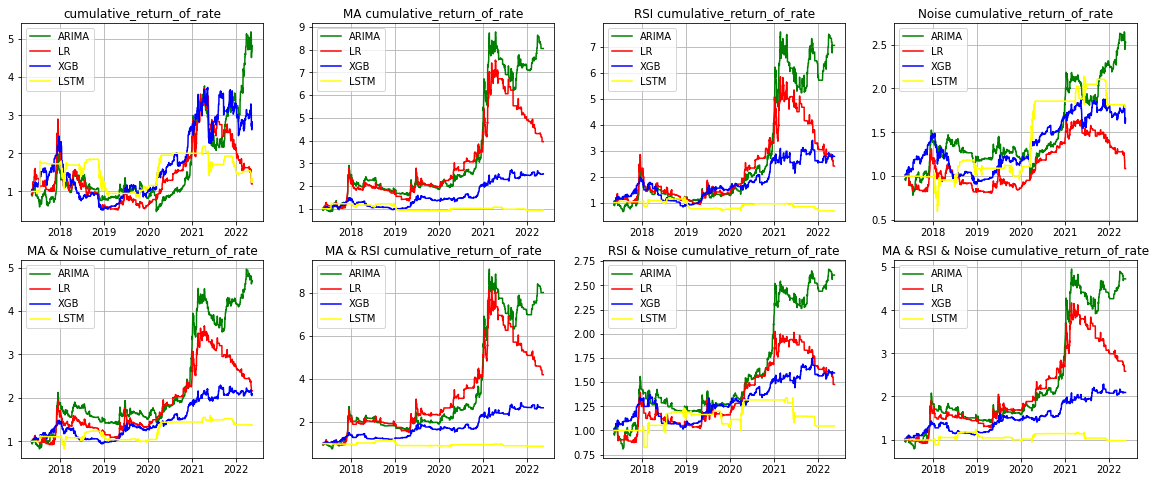

In [188]:
plot_return(cu_ARIMA, cu_LR, cu_XGB, cu_LSTM, "100")

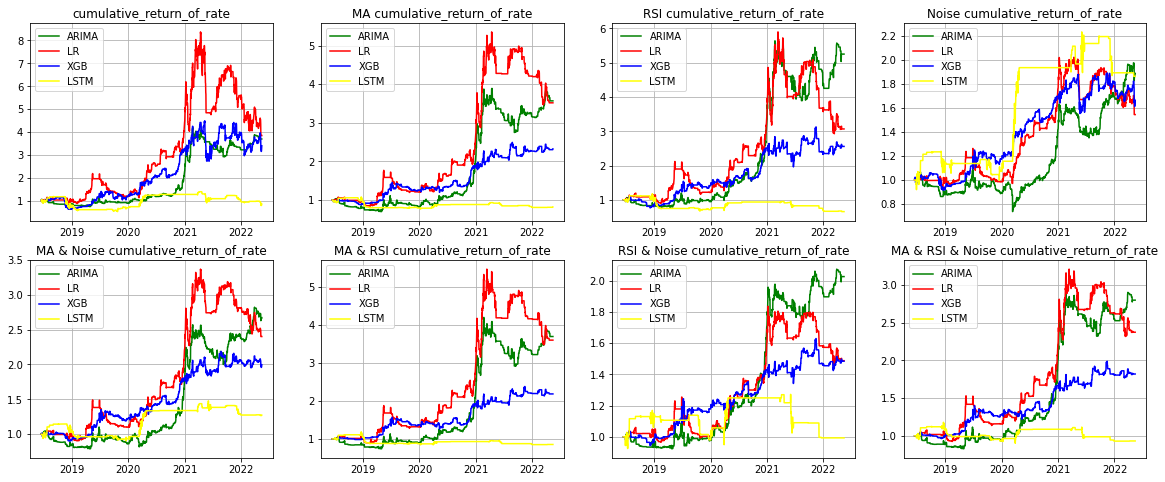

In [189]:
plot_return(cu_best_ARIMA, cu_best_LR, cu_best_XGB, cu_best_LSTM, "best")